In [1]:
salary=[11,40,45,68,65,68,78,90,57,74,91,92,88,68,57,48,99,101,68,77,110,140]

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
# five point summary
np.quantile(salary,[0,0.25,.50,.75,1])

array([ 11.  ,  59.  ,  71.  ,  90.75, 140.  ])

In [6]:
df=pd.DataFrame(salary,columns=['Salary'])

In [7]:
df

,Salary
0,11
1,40
2,45
3,68
4,65
5,68
6,78
7,90
8,57
9,74


In [8]:
df.describe()

,Salary
count,22.000000
mean,74.318182
std,27.201867
min,11.000000
25%,59.000000
50%,71.000000
75%,90.750000
max,140.000000


In [9]:
# To check outliers >> distplot, boxplot

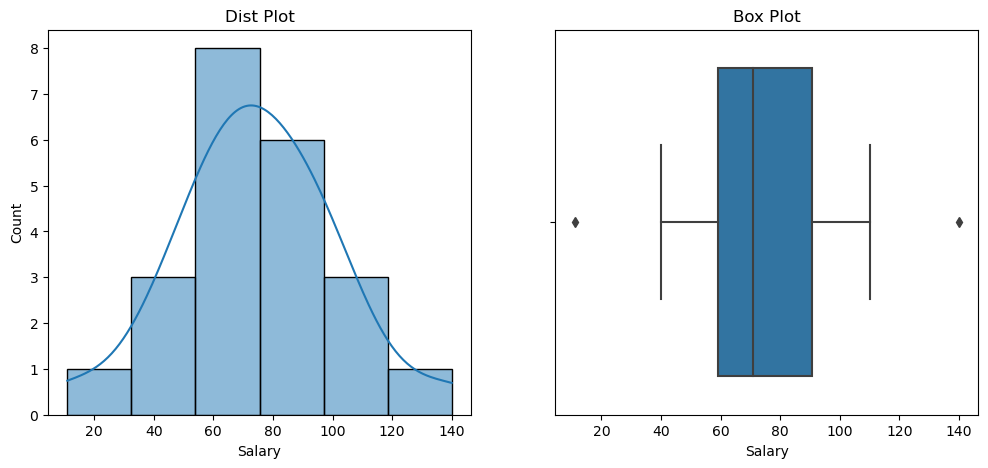

In [11]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Salary'],kde=True)
plt.title('Dist Plot')


plt.subplot(1,2,2)
sns.boxplot(data=df,x='Salary')
plt.title('Box Plot')
plt.show()

In [12]:
# dropping the outlier
# capping the outlier
# replace with mean and median
# Scaling and transformation

In [13]:
Q1=df['Salary'].quantile(0.25)
Q3=df['Salary'].quantile(0.75)

In [14]:
Q1,Q3

(59.0, 90.75)

In [15]:
IQR=Q3-Q1

In [16]:
IQR

31.75

In [20]:
lower_fence=Q1-1.5*IQR
uper_fence=Q3+1.5*IQR

In [21]:
lower_fence

11.375

In [22]:
uper_fence

138.375

In [24]:
df.shape

(22, 1)

In [ ]:
# droping the outlier

In [25]:
(df.Salary>=lower_fence) & (df.Salary<=uper_fence)

0     False
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21    False
Name: Salary, dtype: bool

In [27]:
df_filtered=df[(df.Salary>=lower_fence) & (df.Salary<=uper_fence)]

In [28]:
df_filtered

,Salary
1,40
2,45
3,68
4,65
5,68
6,78
7,90
8,57
9,74
10,91


In [29]:
df_filtered.shape

(20, 1)

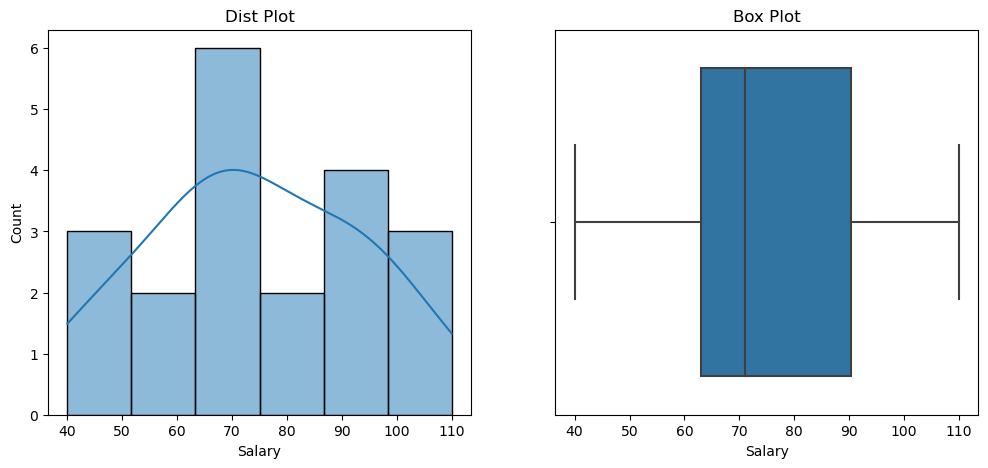

In [30]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df_filtered['Salary'],kde=True)
plt.title('Dist Plot')


plt.subplot(1,2,2)
sns.boxplot(data=df_filtered,x='Salary')
plt.title('Box Plot')
plt.show()

In [32]:
# replace the outliers with mean and median
df['Salary_mean_imputed']=np.where((df.Salary>=uper_fence) | (df.Salary<=lower_fence),df['Salary'].mean(),df['Salary'])

In [33]:
df

,Salary,Salary_mean_imputed
0,11,74.318182
1,40,40.000000
2,45,45.000000
3,68,68.000000
4,65,65.000000
5,68,68.000000
6,78,78.000000
7,90,90.000000
8,57,57.000000
9,74,74.000000


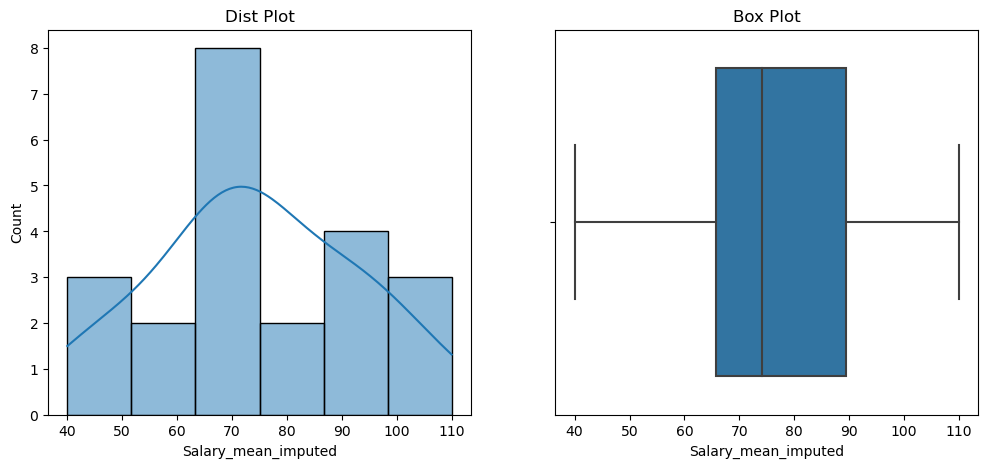

In [35]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Salary_mean_imputed'],kde=True)
plt.title('Dist Plot')


plt.subplot(1,2,2)
sns.boxplot(data=df,x='Salary_mean_imputed')
plt.title('Box Plot')
plt.show()

In [36]:
# capping >> replacing outlier with the nearest values that is not outlier

In [37]:
lower_cap=df['Salary'].quantile(0.05) # lower cap as 5th percentile
upper_cap=df['Salary'].quantile(0.95)

In [38]:
upper_cap

109.55

In [39]:
lower_cap

40.25

In [40]:
df['Salary_capped']=np.where(df['Salary']<lower_cap,lower_cap,
                            np.where(df['Salary']>upper_cap,upper_cap,df['Salary']))

In [41]:
df

,Salary,Salary_mean_imputed,Salary_capped
0,11,74.318182,40.25
1,40,40.000000,40.25
2,45,45.000000,45.00
3,68,68.000000,68.00
4,65,65.000000,65.00
5,68,68.000000,68.00
6,78,78.000000,78.00
7,90,90.000000,90.00
8,57,57.000000,57.00
9,74,74.000000,74.00


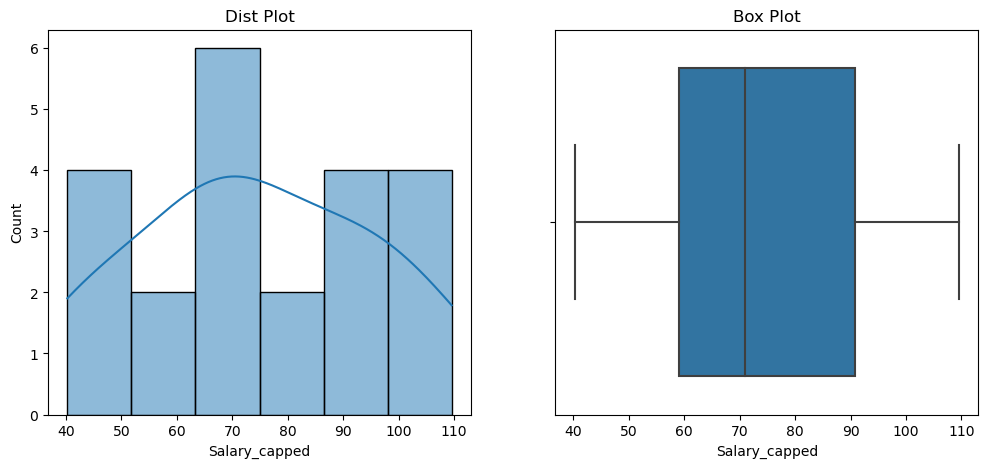

In [42]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Salary_capped'],kde=True)
plt.title('Dist Plot')


plt.subplot(1,2,2)
sns.boxplot(data=df,x='Salary_capped')
plt.title('Box Plot')
plt.show()